# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [2]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!



Stats of batch 4:
Samples: 10000
Label Counts: {0: 1003, 1: 963, 2: 1041, 3: 976, 4: 1004, 5: 1021, 6: 1004, 7: 981, 8: 1024, 9: 983}
First 20 Labels: [0, 6, 0, 2, 7, 2, 1, 2, 4, 1, 5, 6, 6, 3, 1, 3, 5, 5, 8, 1]

Example of Image 5:
Image - Min Value: 13 Max Value: 169
Image - Shape: (32, 32, 3)
Label - Label Id: 2 Name: bird


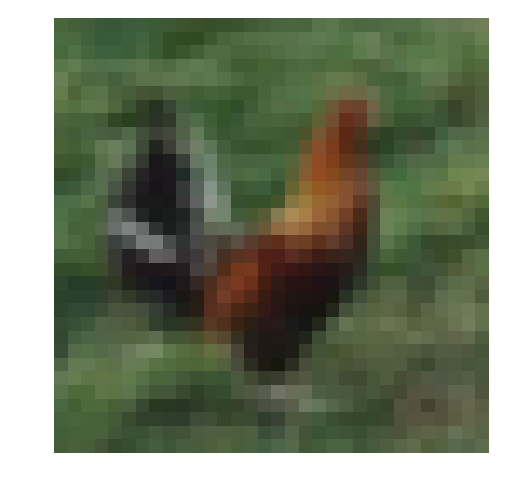

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 4
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [4]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    a = 0.0
    b = 1.0
    x_minval = np.min(x)
    x_maxval = np.max(x)
    return a + ( ( (x - x_minval)*(b - a) )/(x_maxval - x_minval) )

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [5]:
from sklearn import preprocessing
lb = None

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    global lb
    if lb is None:
        lb = preprocessing.LabelBinarizer()
        lb.fit(x)
    oneHot = lb.transform(x)
    return oneHot

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [8]:
from collections import namedtuple
import time
import problem_unittests as tests
import helper
import tensorflow as tf

def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    flattened_tensor = tf.contrib.layers.flatten(x_tensor)
    return flattened_tensor

def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    output = tf.contrib.layers.fully_connected(x_tensor, 
                                               num_outputs)
    return output

def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    output = tf.contrib.layers.fully_connected(x_tensor, 
                                               num_outputs,
                                               activation_fn = None)
    return output

def conv_net(image_shape, n_classes, keep_prob):
    """
    Create a convolutional neural network model
    : image_shape: tuple describing the shape of the picture
    : n_classes: the number of possible subjects in a picture
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: the graph
    """
    tf.reset_default_graph()

    # Inputs
    with tf.name_scope('inputs'):
        inputs = tf.placeholder(tf.float32, shape=[None,*image_shape], name='inputs')

    with tf.name_scope('targets'):
        labels = tf.placeholder(tf.float32, shape=(None,n_classes), name='labels')
    
    with tf.name_scope('keep_prob'):
        keep_prob = tf.placeholder(tf.float32, name='keep_prob')

    # Model
    with tf.name_scope('conv_forward'):

        conv_num_outputs1 = 48              #         EDIT HERE
        conv_num_outputs2 = 96              #         EDIT HERE
        conv_num_outputs3 = 192              #         EDIT HERE
    
        conv_ksize1 = (4,4)              #         EDIT HERE
        conv_ksize2 = (4,4)              #         EDIT HERE
        conv_ksize3 = (3,3)              #         EDIT HERE
    
        conv_strides1 = (1,1)              #         EDIT HERE
        conv_strides2 = (2,2)              #         EDIT HERE
        conv_strides3 = (1,1)              #         EDIT HERE
    
        pool_ksize1 = (3,3)              #         EDIT HERE
        pool_ksize2 = (3,3)              #         EDIT HERE
        pool_ksize3 = (2,2)              #         EDIT HERE
    
        pool_strides1 = (1,1)              #         EDIT HERE
        pool_strides2 = (1,1)              #         EDIT HERE
        pool_strides3 = (1,1)              #         EDIT HERE
    
        with tf.name_scope('conv_layers'):
            with tf.name_scope('conv1'):
                with tf.name_scope('weights1'):
                    weight1 = tf.Variable(tf.truncated_normal([*conv_ksize1, 
                                                               int(inputs.shape[3]), 
                                                               conv_num_outputs1],
                                                              mean=0.0,     # EDIT THIS
                                                              stddev=0.02,  # EDIT THIS
                                                              dtype=tf.float32))
                    tf.summary.histogram('weight1',weight1)
                    
                with tf.name_scope('bias1'):
                    bias1 = tf.Variable(tf.zeros(conv_num_outputs1))
                    tf.summary.histogram('bias1',bias1)
                
                conv_layer1 = tf.nn.conv2d(input=inputs,
                                           filter=weight1, 
                                           strides=[1,*conv_strides1,1], 
                                           padding='SAME')
                conv_layer1 = tf.nn.bias_add(conv_layer1, 
                                             bias1)
                conv_layer1 = tf.nn.relu(conv_layer1)
                
                with tf.name_scope('pooling1'):
                    conv_layer1 = tf.nn.max_pool(value=conv_layer1,
                                                 ksize = [1, *pool_ksize1,1],
                                                 strides = [1, *pool_strides1, 1], 
                                                 padding='SAME')
            with tf.name_scope('conv2'):
                with tf.name_scope('weights2'):
                    weight2 = tf.Variable(tf.truncated_normal([*conv_ksize2,
                                                               int(conv_layer1.shape[3]),
                                                               conv_num_outputs2],
                                                              mean=0.0,     # EDIT THIS
                                                              stddev=0.02,  # EDIT THIS
                                                              dtype=tf.float32))
                    tf.summary.histogram('weight2',weight2)
                    
                with tf.name_scope('bias2'):
                    bias2 = tf.Variable(tf.zeros(conv_num_outputs2))
                    tf.summary.histogram('bias2',bias2)
                
                conv_layer2 = tf.nn.conv2d(input=conv_layer1,
                                          filter=weight2, 
                                          strides=[1,*conv_strides2,1], 
                                          padding='SAME')
                conv_layer2 = tf.nn.bias_add(conv_layer2,
                                             bias2)
                conv_layer2 = tf.nn.relu(conv_layer2)
                
                with tf.name_scope('pooling2'):
                    conv_layer2 = tf.nn.max_pool(value=conv_layer2,
                                                 ksize = [1, *pool_ksize2,1],
                                                 strides = [1, *pool_strides2, 1],
                                                 padding='SAME')
                    
            with tf.name_scope('conv3'):
                with tf.name_scope('weights3'):
                    weight3 = tf.Variable(tf.truncated_normal([*conv_ksize3,
                                                               int(conv_layer2.shape[3]),
                                                               conv_num_outputs3],
                                                              mean=0.0,     # EDIT THIS
                                                              stddev=0.02,  # EDIT THIS
                                                              dtype=tf.float32))
                    tf.summary.histogram('weight3',weight3)
                    
                with tf.name_scope('bias3'):
                    bias3 = tf.Variable(tf.zeros(conv_num_outputs3))
                    tf.summary.histogram('bias3',bias3)
                
                conv_layer3 = tf.nn.conv2d(input=conv_layer2,
                                           filter=weight3, 
                                           strides=[1,*conv_strides3,1], 
                                           padding='SAME')
                conv_layer3 = tf.nn.bias_add(conv_layer3,
                                             bias3)
                conv_layer3 = tf.nn.relu(conv_layer3)
                
                with tf.name_scope('pooling3'):
                    conv_layer3 = tf.nn.max_pool(value=conv_layer3,
                                                 ksize = [1, *pool_ksize3,1],
                                                 strides = [1, *pool_strides3, 1],
                                                 padding='SAME')
            with tf.name_scope('dropout'):
                conv3 = tf.nn.dropout(conv_layer3, keep_prob)
    
    with tf.name_scope('flatten_layer'):
        flat_layer = flatten(conv3)

    with tf.name_scope('fully_connected_layers'):
        fully_co = fully_conn(flat_layer,256)           #          EDIT HERE
        fully_co = tf.nn.dropout(fully_co, keep_prob)
        fully_co = fully_conn(fully_co,128)              #         EDIT HERE
        fully_co = tf.nn.dropout(fully_co, keep_prob)
    
    with tf.name_scope('logits'):
        logits = output(fully_co, 10)
        tf.summary.histogram('logits',logits)
    
    logits = tf.identity(logits, name='logits')
    
    with tf.name_scope('predictions'):
        preds = tf.nn.softmax(logits, name='predictions')
        tf.summary.histogram('predictions', preds)

    with tf.name_scope('cost'):
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
        tf.summary.scalar('cost',cost)
    
    with tf.name_scope('train'):
        optimizer = tf.train.AdamOptimizer().minimize(cost)
        
    with tf.name_scope('accuracy'):
        correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')
    
    merged = tf.summary.merge_all()

    export_nodes = ['inputs', 'labels', 'keep_prob', 'weight1', 'bias1', 
                    'weight2', 'bias2','weight3', 'bias3', 'logits',
                    'preds', 'cost', 'optimizer','accuracy','merged']
    Graph = namedtuple("Graph", export_nodes)
    local_dict = locals()
    graph = Graph(*[local_dict[each] for each in export_nodes])

    return graph

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [9]:
#THIS IS THE ONE
epochs = 2
batch_size = 128
keep_probability = .75
save_every_n = 100
image_shape=(32, 32, 3)
n_classes=10

model = conv_net(image_shape=image_shape,
                 n_classes=n_classes,
                 keep_prob=keep_probability)

saver = tf.train.Saver(max_to_keep=100)

def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    loss = sess.run(model.cost, feed_dict={model.inputs: feature_batch, model.labels:label_batch, model.keep_prob:1.0})
    accuracy = session.run(model.accuracy, feed_dict={model.inputs: valid_features, model.labels: valid_labels,model.keep_prob: 1.0})
    print('Loss at {}'.format(loss), 'Validation Accuracy at {}'.format(accuracy))


print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    train_writer = tf.summary.FileWriter('./logs/6/train', sess.graph) # EDIT HERE TO SAVE TENSORBOARD INPUTS TO DIFFERENT PLACE
    #test_writer = tf.summary.FileWriter('./logs/3/test')
    
    # Training cycle
    for epoch in range(epochs):
        batches = 1
        for batch_i in range(1, batches+1):
            start = time.time()
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                feed = {model.inputs:batch_features, 
                        model.labels:batch_labels, 
                        model.keep_prob:keep_probability}
                summary, batch_loss, _ = sess.run([model.merged, 
                                                   model.cost,
                                                   model.optimizer],
                                                  feed_dict=feed)
            end = time.time()
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print('Epoch {}/{} '.format(epoch+1, epochs),
                  '{:.4f} sec/batch'.format((end-start)))
            print_stats(sess, batch_features, batch_labels, model.cost, model.accuracy)
            train_writer.add_summary(summary, batch_i)
            
    saver = tf.train.Saver()
    #save_path = saver.save(sess, save_model_path)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Epoch 1/2  71.0248 sec/batch
Loss at 2.0214686393737793 Validation Accuracy at 0.3287999927997589
Epoch  2, CIFAR-10 Batch 1:  Epoch 2/2  70.8732 sec/batch
Loss at 1.9066978693008423 Validation Accuracy at 0.38359999656677246


### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches. Change the variable batches to 5

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

Testing Accuracy: 0.7104430379746836



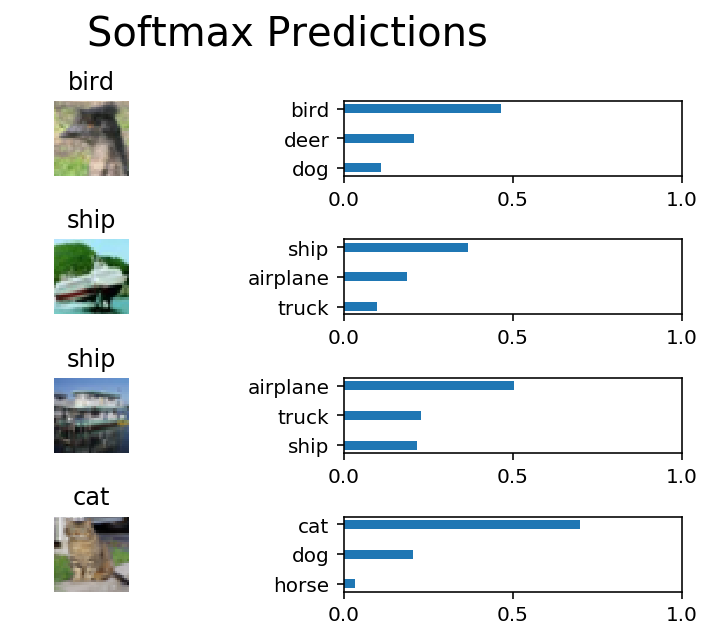

In [21]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.